In [1]:
using PyPlot
include("lib/all.jl");

In [2]:
particles = make_particles(2^20);
t = DTree(particles, 12);

In [3]:
@time group!(t);

  0.365208 seconds (315.32 k allocations: 10.921 MB)


In [4]:
@time inform!(t);

  0.276222 seconds (631.11 k allocations: 13.627 MB, 19.94% gc time)


In [5]:
ax = zeros(length(particles))
ay = zeros(length(particles))
az = zeros(length(particles));

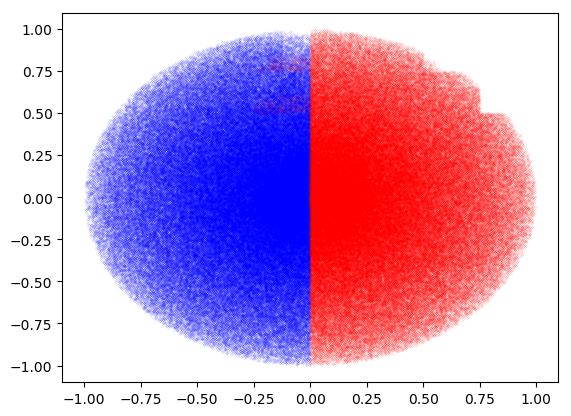

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1bac0486d8>

In [6]:
x1 = [p.x for p in t.trees[1].particles]
y1 = [p.z for p in t.trees[1].particles]
x2 = [p.x for p in t.trees[3].particles]
y2 = [p.z for p in t.trees[3].particles]
plot(x1,y1,"b.",ms=0.1)
plot(x2,y2,"r.",ms=0.1)

In [7]:
@time interact!(t, 0.3, ax, ay, az, 1.0e-3);

  1.948943 seconds (4.63 M allocations: 110.764 MB, 1.43% gc time)


In [21]:
ts=Float64[]
for i in 1:12
    tic()
    interact!(t, 0.3, ax, ay, az, 1.0e-3);
    append!(ts, toq())
    @show i
end

i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12


In [22]:
mean(ts)

0.3222399613333334

In [12]:
@time collect!(t)

  0.172975 seconds (2.45 M allocations: 37.330 MB, 6.90% gc time)


In [17]:
@time accel!(t, ax,ay,az)

  0.715264 seconds (8.94 M allocations: 136.288 MB, 6.09% gc time)


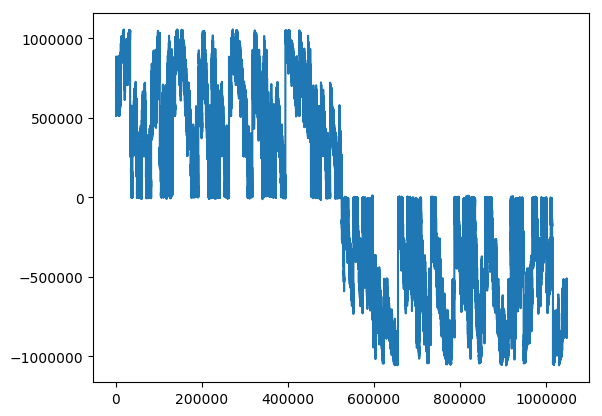

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7effdfd995c0>

In [30]:
plot(ax)

In [31]:
mean(abs(ax))/1e5

5.16848306941108

In [32]:
mx,myd,e50,e90,e95,e99,m,s = perf(particles, ax,ay,az, 10000, 1.0e-3)
print(myd)

mean(abs(rax)) = 519034.76738231885
[0.0,0.0,1.0,0.0,2.0,4.0,9.0,27.0,57.0,134.0,261.0,516.0,962.0,1530.0,1929.0,1868.0,1291.0,731.0,382.0,154.0,92.0,35.0,10.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

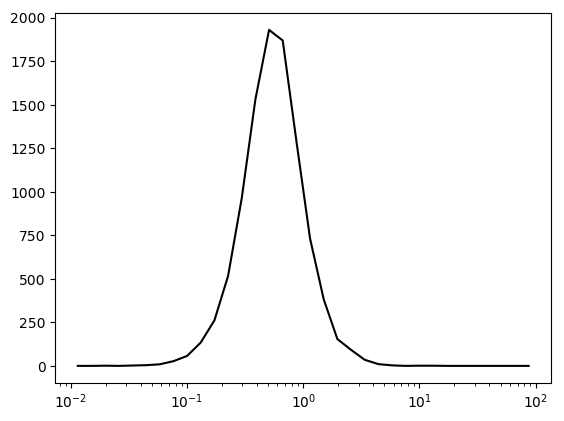

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7effdfd47c88>

In [33]:
semilogx(10.^mx,myd,"-k")

In [34]:
e50

0.545661545317433

In [35]:
e90

1.1375261773720498

In [36]:
e99

2.4590263691515233